In [1]:
import pandas as pd
import numpy as np
import re
import pickle
import matplotlib.pyplot as plt
from readability import Readability

### Generate readability indexes
Text must be min 100 words tho.

#### Flesch-Kincaid Grade Level
This is US Army assessment for difficulty of technical manuals. Its aim is to score the reading difficulty to ninth grade level for legal documents and financial forms. 

#### Flesch Reading Ease
This is is a standard test of readability for its documents and forms. 

#### Dale Chall Readability 
It uses readability based on familiarity of words rather than syllable or letter counts. 

#### Automated Readability Index 
relies on a factor of characters per word instead of syllables.

#### Gunning Fog
Readability for english. estimates the years of formal education needed to understand the text on a first reading. 

#### SMOG a simple measure of gobbledygook
it is used to measure readability of health literacy materials. It uses a sample of 30 sentences from the original texts but can be used to generalise the entire text as well. 

#### Spache
Is used for Primary Grade reading materials. published in 1953. Best used for difficulty of text at 3rd grade level or below. 

#### Linsear White 
Metric for English for USAF to calculate readability of technical manuals. 

Final choice: to avoid technical documents metrics, and focus on information transfer and ease of readability. should not be skewed to lower age education reading levels. 
* Dale Chall
* Gunning Fog
* SMOG
* Flesch-Kincaid 
* Automatic Readability


In [5]:
df = pd.read_csv("./data/WELFake_Dataset.csv")
print(df.columns)
print(df.shape)
print(type(df.loc[7, "text"]))
print(df)

text_iterator = df["text"]
title_iterator = df["title"]
def combine_columns(row):
    return str(row["title"]) + ". " + str(row["text"])


# Apply the custom function to create a new column 'Combined'
df["Combined"] = df.apply(combine_columns, axis=1)
merged_iterator = df["Combined"]

Index(['Unnamed: 0', 'title', 'text', 'label'], dtype='object')
(72134, 4)
<class 'str'>
       Unnamed: 0                                              title  \
0               0  LAW ENFORCEMENT ON HIGH ALERT Following Threat...   
1               1                                                NaN   
2               2  UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...   
3               3  Bobby Jindal, raised Hindu, uses story of Chri...   
4               4  SATAN 2: Russia unvelis an image of its terrif...   
...           ...                                                ...   
72129       72129  Russians steal research on Trump in hack of U....   
72130       72130   WATCH: Giuliani Demands That Democrats Apolog...   
72131       72131  Migrants Refuse To Leave Train At Refugee Camp...   
72132       72132  Trump tussle gives unpopular Mexican leader mu...   
72133       72133  Goldman Sachs Endorses Hillary Clinton For Pre...   

                                              

In [6]:
# readability indexe preprocssing 
def process_text(text_iterator):
    text_processed = []
    for text in text_iterator:        
        try:
            # remove non ascii (language english only)
            t = re.sub(r'[^\x00-\x7F]', ' ', text)
            # remove multiple spaces
            t = re.sub(r" +", " ", t)
            # remove newline
            t = re.sub(r"\n", " ", t)
            # clear trailing whitespaces
            t = t.strip()
            # lowercase
            t = t.lower()
            if len(t) == 0:
                text_processed.append(None)
            else:
                text_processed.append(t)
        except:
            text_processed.append(None)
            continue
    return text_processed

merged_title_text = process_text(merged_iterator)

In [7]:
print(merged_title_text[1])

nan. did they post their votes for hillary already?


In [4]:
readability_index_ls = []
for text in merged_title_text:
    try:
        r = Readability(text)
    except:
        r = None
    readability_index_ls.append(r)
print("done")

done


In [5]:
print(len(readability_index_ls))
print(readability_index_ls[0].dale_chall().score)
print(readability_index_ls[0].gunning_fog())
print(readability_index_ls[0].smog())
print(readability_index_ls[0].flesch_kincaid())

72134
8.7986523654749
score: 11.895350306970025, grade_level: '12'
score: 12.68835289967788, grade_level: 13
score: 8.681980408089565, grade_level: '9'


In [6]:
dale_chall_ls = []
gunning_fog_ls = []
smog_ls = []
flesch_kincaid_ls = []
automatic_readability_ls = []
r :Readability
for r in readability_index_ls:
    try:
        dale_chall_ls.append(r.dale_chall().score)
    except:    
        dale_chall_ls.append(np.NaN)
    try:
        gunning_fog_ls.append(r.gunning_fog().score)
    except:
        gunning_fog_ls.append(np.NaN) 
    try:
        smog_ls.append(r.smog().score)
    except:    
        smog_ls.append(np.NaN)
    try:
        flesch_kincaid_ls.append(r.flesch_kincaid().score)
    except:
        flesch_kincaid_ls.append(np.NaN)
    try:
        automatic_readability_ls.append(r.ari().score)
    except:
        automatic_readability_ls.append(np.NaN)

In [7]:
print(len(dale_chall_ls))

72134


In [9]:
# import the content table 
with open("./data/df_content_features_part_1.pkl","rb") as f:
    df_features = pickle.load(f)

print(df_features.shape)
# add the readability indexes 
df_features["dale_chall"] = dale_chall_ls
df_features["gunning_fog"] = gunning_fog_ls
df_features["smog"] = smog_ls
df_features["flesch_kincaid"] = flesch_kincaid_ls
df_features["automatic_readability"] = automatic_readability_ls


(72134, 20)


In [10]:
print(df_features.shape)
print(df_features.columns)
df_features.to_pickle("./data/content_features_part_2.pkl")

(72134, 25)
Index(['label', 'adverbs', 'nouns', 'proper_nouns', 'adjectives',
       'conjunctions', 'verbs_third_person', 'verbs_others',
       'words_per_sentence_variance', 'words_per_sentence_median',
       'num_long_sentences', 'num_short_sentences', 'num_of_sentences',
       'adverbs_rate', 'nouns_rate', 'proper_nouns_rate', 'adjectives_rate',
       'conjunctions_rate', 'verbs_third_person_rate', 'verbs_others_rate',
       'dale_chall', 'gunning_fog', 'smog', 'flesch_kincaid',
       'automatic_readability'],
      dtype='object')


## Select Features using linearity check

In [2]:
with open("./data/content_features_part_2.pkl","rb") as f:
    df_features = pickle.load(f)
print(df_features.columns)
df_features.head()

Index(['label', 'adverbs', 'nouns', 'proper_nouns', 'adjectives',
       'conjunctions', 'verbs_third_person', 'verbs_others',
       'words_per_sentence_variance', 'words_per_sentence_median',
       'num_long_sentences', 'num_short_sentences', 'num_of_sentences',
       'adverbs_rate', 'nouns_rate', 'proper_nouns_rate', 'adjectives_rate',
       'conjunctions_rate', 'verbs_third_person_rate', 'verbs_others_rate',
       'dale_chall', 'gunning_fog', 'smog', 'flesch_kincaid',
       'automatic_readability'],
      dtype='object')


,label,adverbs,nouns,proper_nouns,adjectives,conjunctions,verbs_third_person,verbs_others,words_per_sentence_variance,words_per_sentence_median,...,proper_nouns_rate,adjectives_rate,conjunctions_rate,verbs_third_person_rate,verbs_others_rate,dale_chall,gunning_fog,smog,flesch_kincaid,automatic_readability
0,1,18,218,1,100,1,85,38,77.948870,13.0,...,0.016667,1.666667,0.016667,1.416667,0.633333,8.798652,11.895350,12.688353,8.681980,8.968798
1,1,1,2,0,0,0,0,1,24.500000,4.5,...,0.000000,0.000000,0.000000,0.000000,0.500000,NaN,NaN,NaN,NaN,NaN
2,1,1,19,0,8,0,3,4,124.333333,13.5,...,0.000000,2.000000,0.000000,0.750000,1.000000,NaN,NaN,NaN,NaN,NaN
3,0,28,377,1,149,0,137,35,213.760973,19.0,...,0.016129,2.403226,0.000000,2.209677,0.564516,9.609612,16.245782,15.514039,12.683997,13.495336
4,1,5,102,0,46,0,27,4,341.935897,25.0,...,0.000000,3.538462,0.000000,2.076923,0.307692,12.289804,19.805272,NaN,16.267989,17.923524


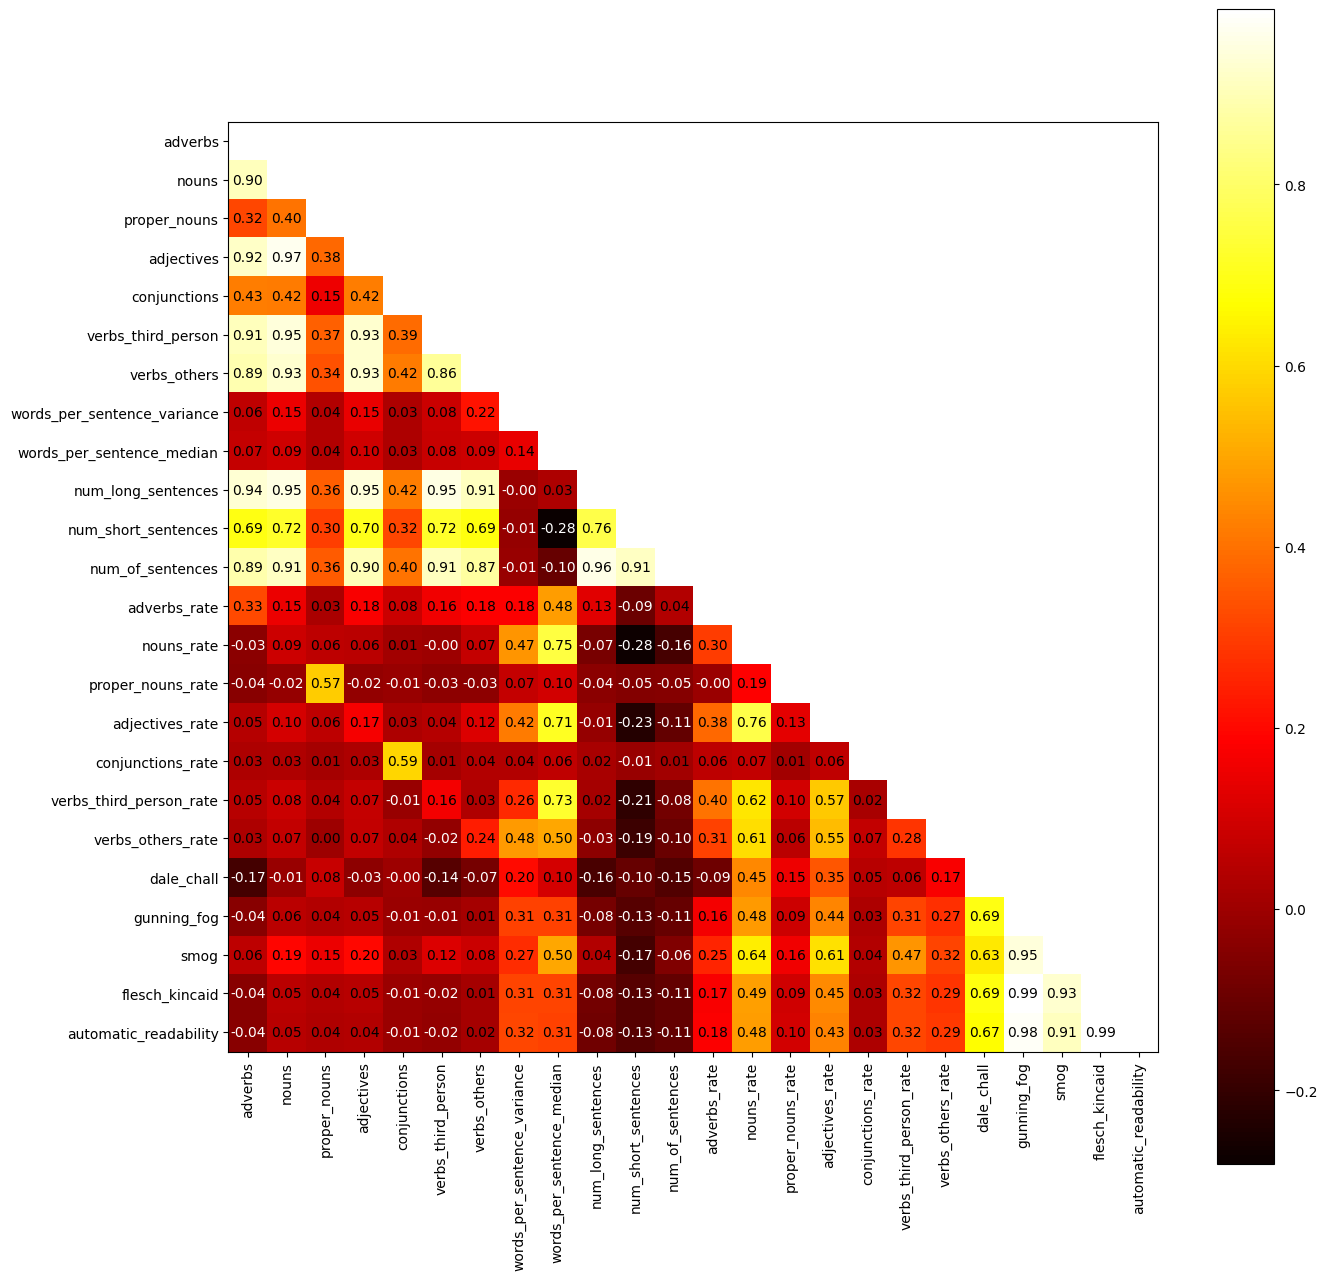

In [3]:
# linearity check
cols = list(df_features.columns)
cols.remove("label")
df_linearity = pd.DataFrame(index=cols, columns=cols,dtype=float)
for i, col in enumerate(cols):
    for other in cols[:i]:
        correlation = df_features[col].corr(df_features[other])
        # print(f"Correlation between {col} and {other}:", correlation)
        df_linearity.loc[col,other] = correlation

plt.figure(figsize=(15,15))
plt.imshow(df_linearity, cmap='hot', interpolation='nearest')
plt.xticks(ticks=range(len(cols)), labels=cols, rotation=90)
plt.yticks(ticks=range(len(cols)), labels=cols)
# Annotate the heatmap with numbers
for y in range(len(cols)):
    for x in range(len(cols)):
        plt.text(x, y, f'{df_linearity.iloc[y, x]:.2f}',
                 horizontalalignment='center',
                 verticalalignment='center',
                 color='black' if df_linearity.iloc[y, x] > 0 else 'white')
plt.colorbar() 
plt.show()

In [4]:
# selecting columns 
cols_to_drop = {}
for i,col in enumerate(cols):
    for other in cols[:i]:
        if df_linearity.loc[col,other] >= 0.9:
            if col not in cols_to_drop.keys(): 
                cols_to_drop[col] = []
            cols_to_drop[col].append(other)
for i in cols_to_drop:
    print(i+str(cols_to_drop[i]))

nouns['adverbs']
adjectives['adverbs', 'nouns']
verbs_third_person['adverbs', 'nouns', 'adjectives']
verbs_others['nouns', 'adjectives']
num_long_sentences['adverbs', 'nouns', 'adjectives', 'verbs_third_person', 'verbs_others']
num_of_sentences['nouns', 'adjectives', 'verbs_third_person', 'num_long_sentences', 'num_short_sentences']
smog['gunning_fog']
flesch_kincaid['gunning_fog', 'smog']
automatic_readability['gunning_fog', 'smog', 'flesch_kincaid']


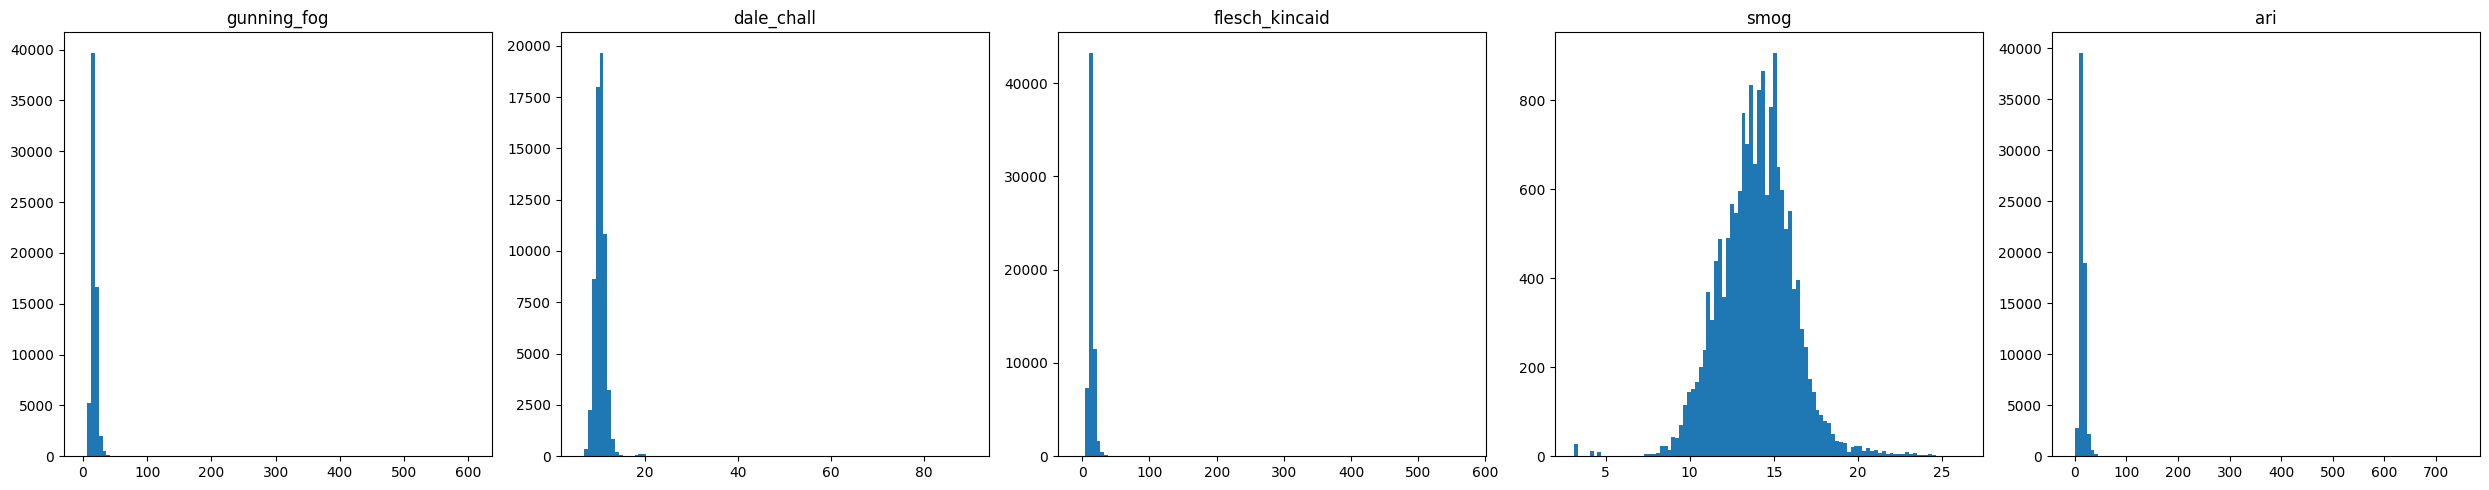

In [5]:
# check the distribution of the readability indexes 

fig, axs = plt.subplots(1,5, figsize=(25, 5))

axs[0].hist(df_features["gunning_fog"], bins=100)
axs[0].set_title("gunning_fog")
axs[1].hist(df_features["dale_chall"], bins=100)
axs[1].set_title("dale_chall")
axs[2].hist(df_features["flesch_kincaid"], bins=100)
axs[2].set_title("flesch_kincaid")
axs[3].hist(df_features["smog"], bins=100)
axs[3].set_title("smog")
axs[4].hist(df_features["automatic_readability"], bins=100)
axs[4].set_title("ari")

# Adjusting the layout to ensure that the subplots do not overlap
plt.tight_layout()

# Displaying the figure with all subplots
plt.show()

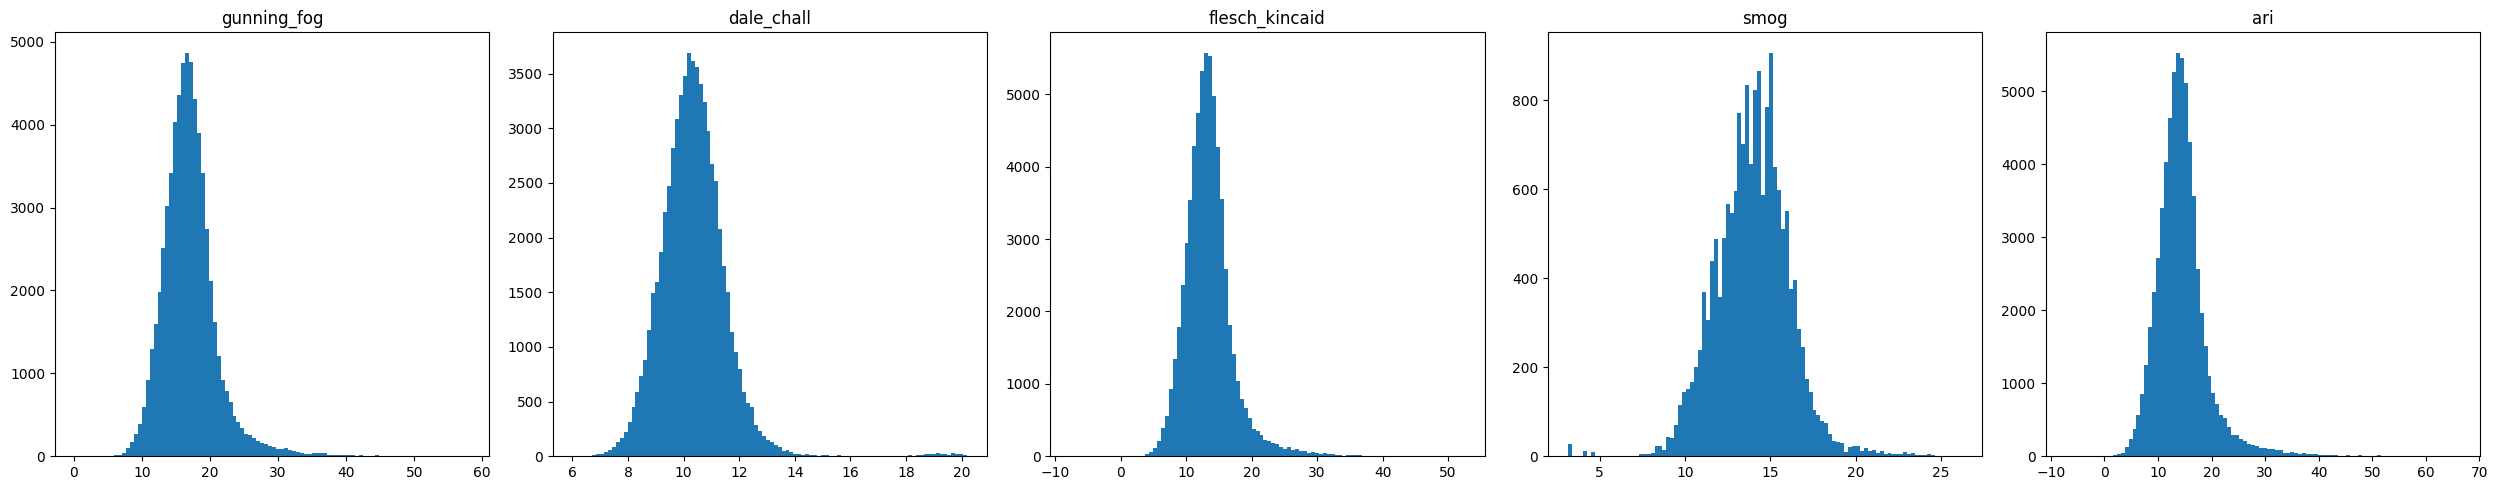

In [6]:
# drop the edge cases so we can observe the distribution better
quantile = 0.999
gunning_fog_percentile = df_features["gunning_fog"].quantile(quantile)
dale_chall_percentile = df_features["dale_chall"].quantile(quantile)
flesch_kincaid_percentile = df_features["flesch_kincaid"].quantile(quantile)
ari_percentile = df_features["automatic_readability"].quantile(quantile)

# check the distribution of the readability indexes 
fig, axs = plt.subplots(1,5, figsize=(25, 5))

axs[0].hist(df_features[df_features["gunning_fog"]<gunning_fog_percentile]["gunning_fog"], bins=100)
axs[0].set_title("gunning_fog")
axs[1].hist(df_features[df_features["dale_chall"]<dale_chall_percentile]["dale_chall"], bins=100)
axs[1].set_title("dale_chall")
axs[2].hist(df_features[df_features["flesch_kincaid"]<flesch_kincaid_percentile]["flesch_kincaid"], bins=100)
axs[2].set_title("flesch_kincaid")
axs[3].hist(df_features["smog"], bins=100)
axs[3].set_title("smog")
axs[4].hist(df_features[df_features["automatic_readability"]<ari_percentile]["automatic_readability"], bins=100)
axs[4].set_title("ari")

# Adjusting the layout to ensure that the subplots do not overlap
plt.tight_layout()

# Displaying the figure with all subplots
plt.show()

### Choice of features

Drop the following columns 
* adverbs
* nouns
* adjectives
* num_long_sentences
* num_short_sentences
* gunning_fog
* flesch_kincaid
* smog
* dale_chall


In [7]:
print(df_features.shape)
df_pos_clean = df_features.drop(columns=["nouns","adjectives","adverbs","num_long_sentences","num_short_sentences","gunning_fog","flesch_kincaid","dale_chall","smog"])
print(df_pos_clean.shape)
print(df_pos_clean.columns)

df_pos_clean.to_pickle("./data/content_features_cv.pkl")
df_pos_clean.to_csv("./data/content_features_cv.csv")

(72134, 25)
(72134, 16)
Index(['label', 'proper_nouns', 'conjunctions', 'verbs_third_person',
       'verbs_others', 'words_per_sentence_variance',
       'words_per_sentence_median', 'num_of_sentences', 'adverbs_rate',
       'nouns_rate', 'proper_nouns_rate', 'adjectives_rate',
       'conjunctions_rate', 'verbs_third_person_rate', 'verbs_others_rate',
       'automatic_readability'],
      dtype='object')
